
Semester 1 Attendance Correlation Matrix:
                                   Math-1 Attendance  Physics Attendance  \
Math-1 Attendance                          1.000000            0.809477   
Physics Attendance                         0.809477            1.000000   
Java-1 Attendance                          0.839585            0.800745   
Software Engineering Attendance            0.803606            0.809434   
Environmental Science Attendance           0.647003            0.645183   
IOT Workshop Attendance                         NaN                 NaN   

                                  Java-1 Attendance  \
Math-1 Attendance                          0.839585   
Physics Attendance                         0.800745   
Java-1 Attendance                          1.000000   
Software Engineering Attendance            0.788036   
Environmental Science Attendance           0.611361   
IOT Workshop Attendance                         NaN   

                                  Software E

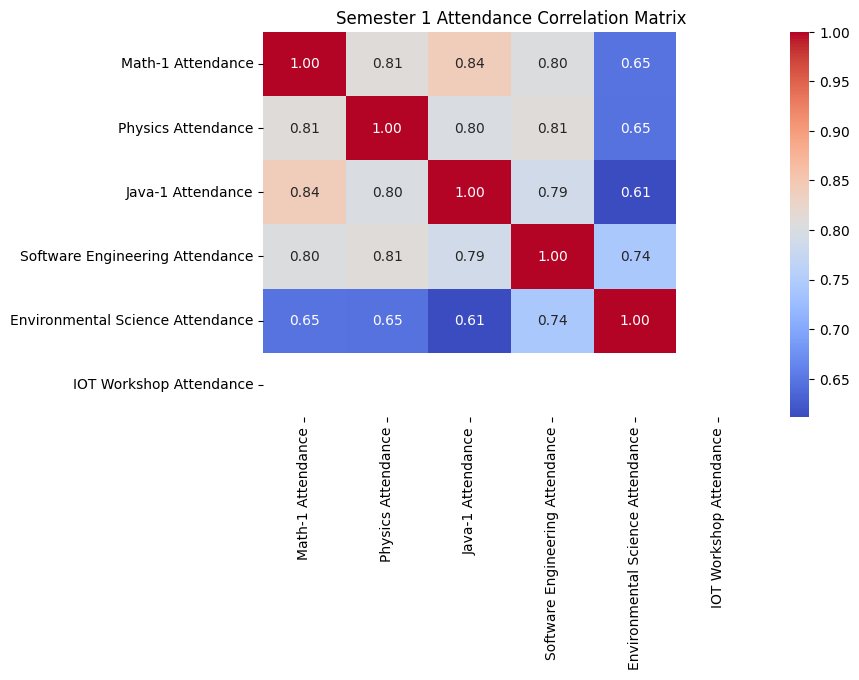

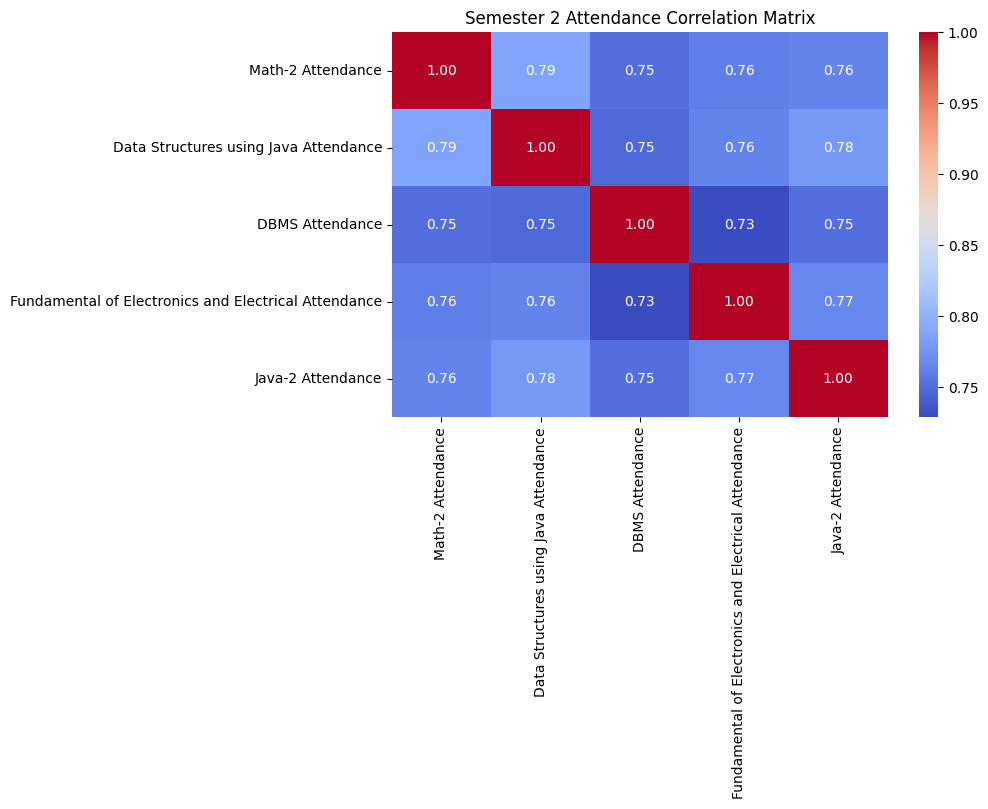


Highly Correlated Attendance Pairs (r > 0.8) - Semester 1:
Math-1 Attendance - Physics Attendance: 0.81
Math-1 Attendance - Java-1 Attendance: 0.84
Math-1 Attendance - Software Engineering Attendance: 0.80
Physics Attendance - Java-1 Attendance: 0.80
Physics Attendance - Software Engineering Attendance: 0.81

Highly Correlated Attendance Pairs (r > 0.8) - Semester 2:


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv("college.csv")

# Step 2: Define subject attendance columns
sem1_subjects = ["Math-1 Attendance", "Physics Attendance", "Java-1 Attendance",
                 "Software Engineering Attendance", "Environmental Science Attendance", "IOT Workshop Attendance"]

sem2_subjects = ["Math-2 Attendance", "Data Structures using Java Attendance", "DBMS Attendance",
                 "Fundamental of Electronics and Electrical Attendance", "Java-2 Attendance"]

# Step 3: Normalize Data using IQR
def normalize_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data - Q1) / IQR  # IQR normalization formula

df_normalized = df.copy()
df_normalized[sem1_subjects] = df[sem1_subjects].apply(normalize_iqr)
df_normalized[sem2_subjects] = df[sem2_subjects].apply(normalize_iqr)

# Step 4: Compute correlation matrices
corr_sem1 = df_normalized[sem1_subjects].corr()
corr_sem2 = df_normalized[sem2_subjects].corr()

# Print correlation matrices
print("\nSemester 1 Attendance Correlation Matrix:\n", corr_sem1)
print("\nSemester 2 Attendance Correlation Matrix:\n", corr_sem2)

# Plot heatmap for Semester 1
plt.figure(figsize=(8, 5))
sns.heatmap(corr_sem1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Semester 1 Attendance Correlation Matrix")
plt.show()

# Plot heatmap for Semester 2
plt.figure(figsize=(8, 5))
sns.heatmap(corr_sem2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Semester 2 Attendance Correlation Matrix")
plt.show()

# Step 5: Identify pairs with correlation > 0.8
def find_high_corr_pairs(correlation_matrix, columns, threshold=0.8):
    pairs = []
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > threshold:
                pairs.append((col1, col2, corr_value))
    return pairs

high_corr_pairs_sem1 = find_high_corr_pairs(corr_sem1, sem1_subjects)
high_corr_pairs_sem2 = find_high_corr_pairs(corr_sem2, sem2_subjects)

# Print high-correlation pairs
print("\nHighly Correlated Attendance Pairs (r > 0.8) - Semester 1:")
for col1, col2, corr_value in high_corr_pairs_sem1:
    print(f"{col1} - {col2}: {corr_value:.2f}")

print("\nHighly Correlated Attendance Pairs (r > 0.8) - Semester 2:")
for col1, col2, corr_value in high_corr_pairs_sem2:
    print(f"{col1} - {col2}: {corr_value:.2f}")


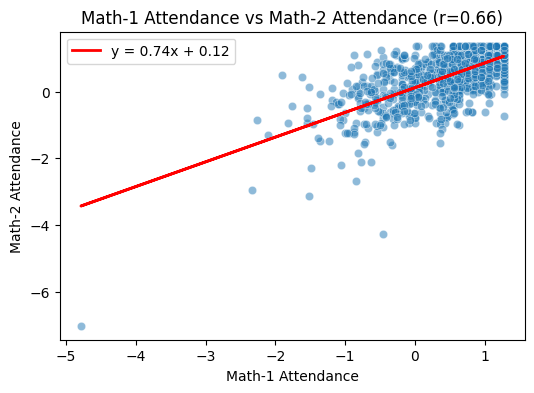

Predecessor-Successor Pair: Math-1 Attendance → Math-2 Attendance
Correlation: 0.66
Regression Equation: y = 0.74x + 0.12



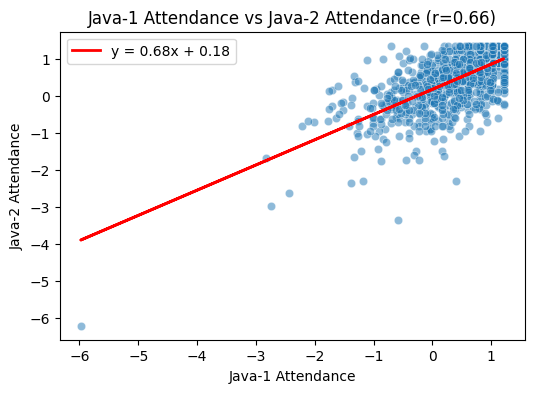

Predecessor-Successor Pair: Java-1 Attendance → Java-2 Attendance
Correlation: 0.66
Regression Equation: y = 0.68x + 0.18



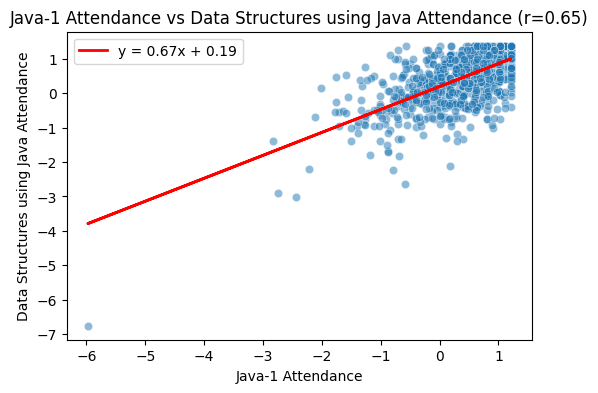

Predecessor-Successor Pair: Java-1 Attendance → Data Structures using Java Attendance
Correlation: 0.65
Regression Equation: y = 0.67x + 0.19



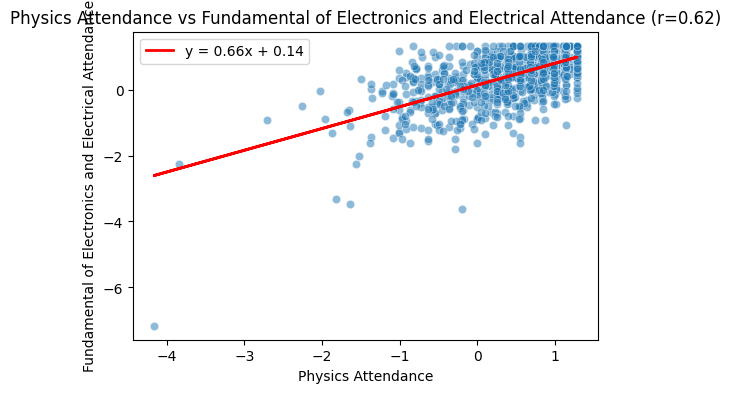

Predecessor-Successor Pair: Physics Attendance → Fundamental of Electronics and Electrical Attendance
Correlation: 0.62
Regression Equation: y = 0.66x + 0.14



In [7]:
predecessor_successor_pairs = [
    ("Math-1 Attendance", "Math-2 Attendance"),
    ("Java-1 Attendance", "Java-2 Attendance"),
    ("Java-1 Attendance", "Data Structures using Java Attendance"),
    ("Physics Attendance", "Fundamental of Electronics and Electrical Attendance")
]

# Step 4: Scatter plots for predecessor-successor pairs
for col1, col2 in predecessor_successor_pairs:
    if col1 in df_normalized.columns and col2 in df_normalized.columns:
        corr_value = df_normalized[col1].corr(df_normalized[col2])
        
        # Scatter plot
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_normalized[col1], y=df_normalized[col2], alpha=0.5)

        # Regression line
        x = df_normalized[col1]
        y = df_normalized[col2]
        m, b = np.polyfit(x, y, 1)  # Linear regression
        plt.plot(x, m * x + b, color="red", linewidth=2, label=f"y = {m:.2f}x + {b:.2f}")

        # Labels and title
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f"{col1} vs {col2} (r={corr_value:.2f})")
        plt.legend()
        plt.show()

        # Print regression equation and correlation
        print(f"Predecessor-Successor Pair: {col1} → {col2}")
        print(f"Correlation: {corr_value:.2f}")
        print(f"Regression Equation: y = {m:.2f}x + {b:.2f}\n")


Semester 1 Theory Correlation Matrix:
                               Math-1 Theory  Physics Theory  Java-1 Theory  \
Math-1 Theory                      1.000000        0.731996       0.648947   
Physics Theory                     0.731996        1.000000       0.671209   
Java-1 Theory                      0.648947        0.671209       1.000000   
Software Engineering Theory        0.636963        0.786501       0.649323   
Environmental Science Theory       0.308953        0.531142       0.409222   

                              Software Engineering Theory  \
Math-1 Theory                                    0.636963   
Physics Theory                                   0.786501   
Java-1 Theory                                    0.649323   
Software Engineering Theory                      1.000000   
Environmental Science Theory                     0.582246   

                              Environmental Science Theory  
Math-1 Theory                                     0.308953  
Ph

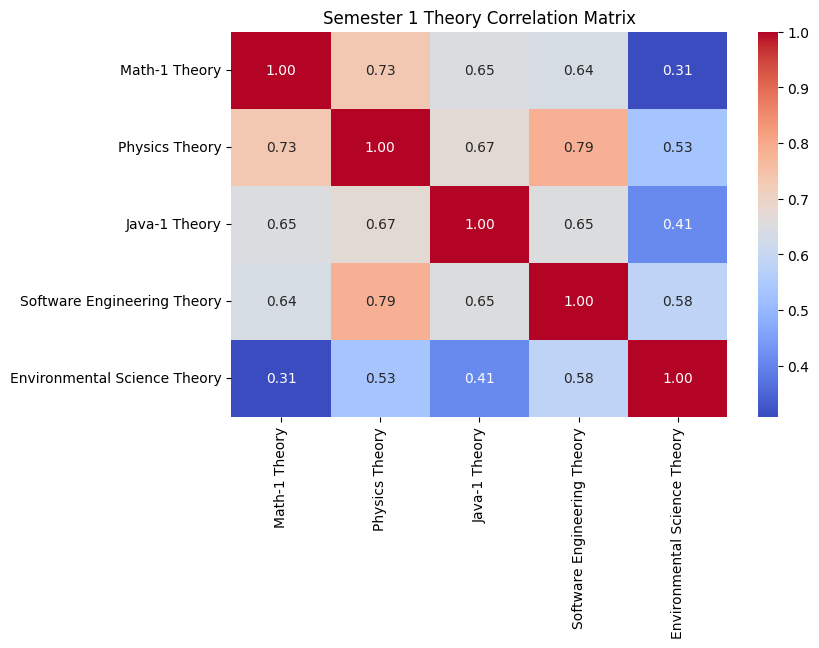

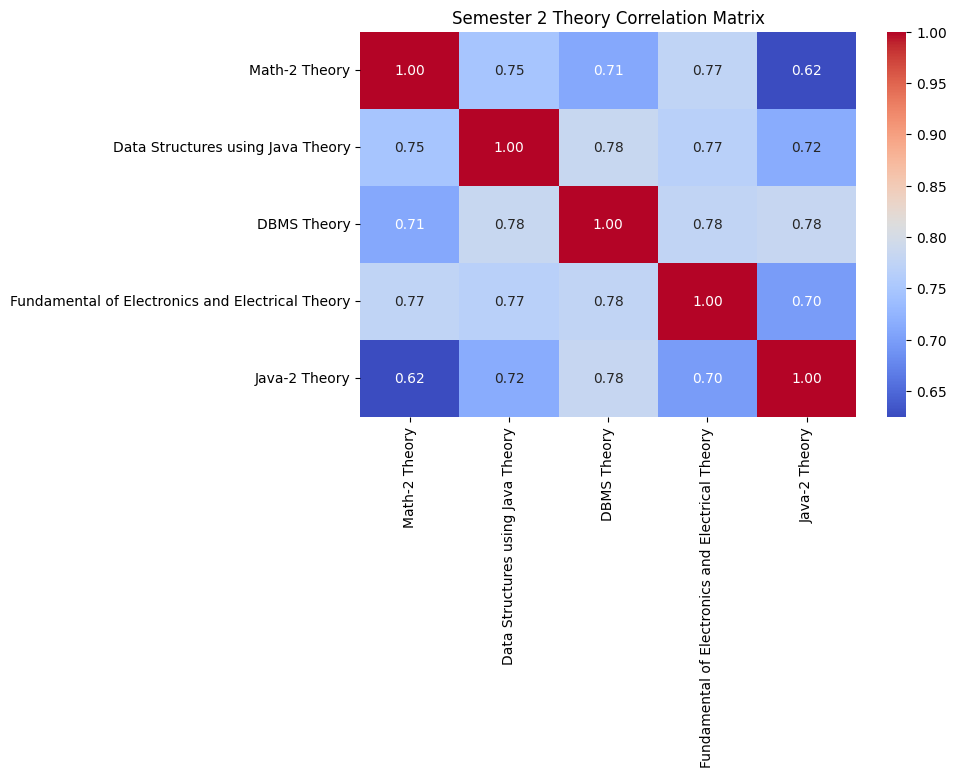


Highly Correlated Theory Pairs (r > 0.8) - Semester 1:

Highly Correlated Theory Pairs (r > 0.8) - Semester 2:


In [10]:
# Step 1: Load the data
df = pd.read_csv("college.csv")

# Step 2: Define theory subjects
sem1_theory = ["Math-1 Theory", "Physics Theory", "Java-1 Theory",
               "Software Engineering Theory", "Environmental Science Theory"]

sem2_theory = ["Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
               "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"]

# Step 3: Normalize Data using IQR
def normalize_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data - Q1) / IQR  # IQR normalization formula

df_normalized = df.copy()
df_normalized[sem1_theory] = df[sem1_theory].apply(normalize_iqr)
df_normalized[sem2_theory] = df[sem2_theory].apply(normalize_iqr)

# Step 4: Compute correlation matrices
corr_sem1 = df_normalized[sem1_theory].corr()
corr_sem2 = df_normalized[sem2_theory].corr()

# Print correlation matrices
print("\nSemester 1 Theory Correlation Matrix:\n", corr_sem1)
print("\nSemester 2 Theory Correlation Matrix:\n", corr_sem2)

# Plot heatmap for Semester 1
plt.figure(figsize=(8, 5))
sns.heatmap(corr_sem1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Semester 1 Theory Correlation Matrix")
plt.show()

# Plot heatmap for Semester 2
plt.figure(figsize=(8, 5))
sns.heatmap(corr_sem2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Semester 2 Theory Correlation Matrix")
plt.show()

# Step 5: Identify pairs with correlation > 0.8
def find_high_corr_pairs(correlation_matrix, columns, threshold=0.8):
    pairs = []
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > threshold:
                pairs.append((col1, col2, corr_value))
    return pairs

high_corr_pairs_sem1 = find_high_corr_pairs(corr_sem1, sem1_theory)
high_corr_pairs_sem2 = find_high_corr_pairs(corr_sem2, sem2_theory)

# Print high-correlation pairs
print("\nHighly Correlated Theory Pairs (r > 0.8) - Semester 1:")
for col1, col2, corr_value in high_corr_pairs_sem1:
    print(f"{col1} - {col2}: {corr_value:.2f}")

print("\nHighly Correlated Theory Pairs (r > 0.8) - Semester 2:")
for col1, col2, corr_value in high_corr_pairs_sem2:
    print(f"{col1} - {col2}: {corr_value:.2f}")

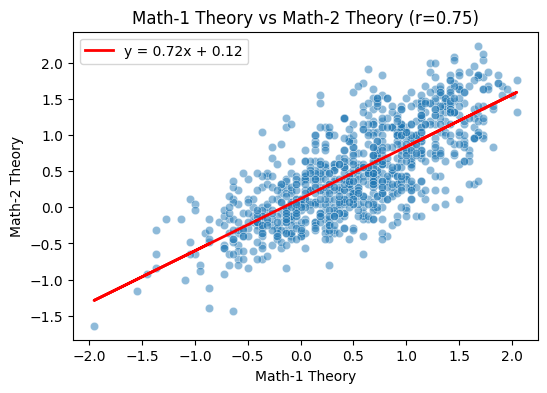

Predecessor-Successor Pair: Math-1 Theory → Math-2 Theory
Correlation: 0.75
Regression Equation: y = 0.72x + 0.12



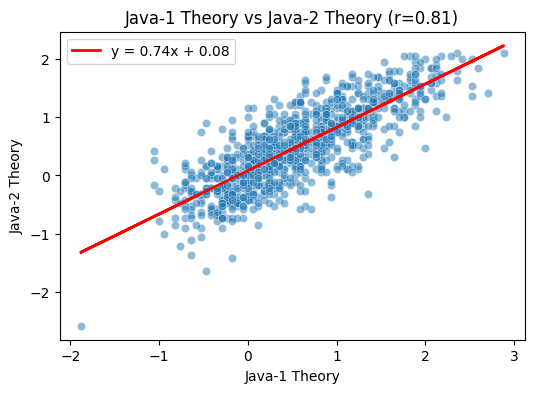

Predecessor-Successor Pair: Java-1 Theory → Java-2 Theory
Correlation: 0.81
Regression Equation: y = 0.74x + 0.08



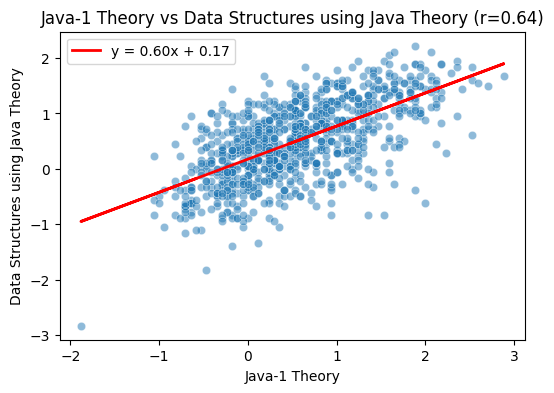

Predecessor-Successor Pair: Java-1 Theory → Data Structures using Java Theory
Correlation: 0.64
Regression Equation: y = 0.60x + 0.17



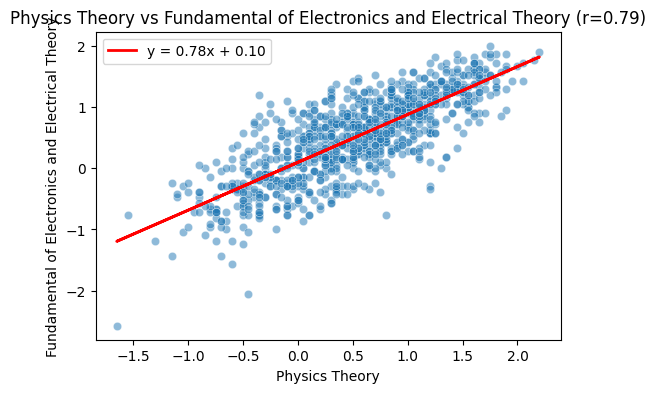

Predecessor-Successor Pair: Physics Theory → Fundamental of Electronics and Electrical Theory
Correlation: 0.79
Regression Equation: y = 0.78x + 0.10



In [12]:
# Step 6: Scatter plots for predecessor-successor pairs in theory subjects
for col1, col2 in theory_predecessor_successor_pairs:
    if col1 in df_normalized.columns and col2 in df_normalized.columns:
        corr_value = df_normalized[col1].corr(df_normalized[col2])
        
        # Scatter plot
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_normalized[col1], y=df_normalized[col2], alpha=0.5)

        # Regression line
        x = df_normalized[col1]
        y = df_normalized[col2]
        m, b = np.polyfit(x, y, 1)  # Linear regression
        plt.plot(x, m * x + b, color="red", linewidth=2, label=f"y = {m:.2f}x + {b:.2f}")

        # Labels and title
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f"{col1} vs {col2} (r={corr_value:.2f})")
        plt.legend()
        plt.show()

        # Print regression equation and correlation
        print(f"Predecessor-Successor Pair: {col1} → {col2}")
        print(f"Correlation: {corr_value:.2f}")
        print(f"Regression Equation: y = {m:.2f}x + {b:.2f}\n")


Semester 1 Practical Correlation Matrix:
                                Physics Practical  Java-1 Practical  \
Physics Practical                        1.000000          0.368902   
Java-1 Practical                         0.368902          1.000000   
Software Engineering Practical           0.197725          0.130727   
IOT Workshop Practical                   0.325233          0.388283   
Computer Workshop Practical              0.299634          0.331118   

                                Software Engineering Practical  \
Physics Practical                                     0.197725   
Java-1 Practical                                      0.130727   
Software Engineering Practical                        1.000000   
IOT Workshop Practical                                0.242150   
Computer Workshop Practical                           0.203597   

                                IOT Workshop Practical  \
Physics Practical                             0.325233   
Java-1 Practical   

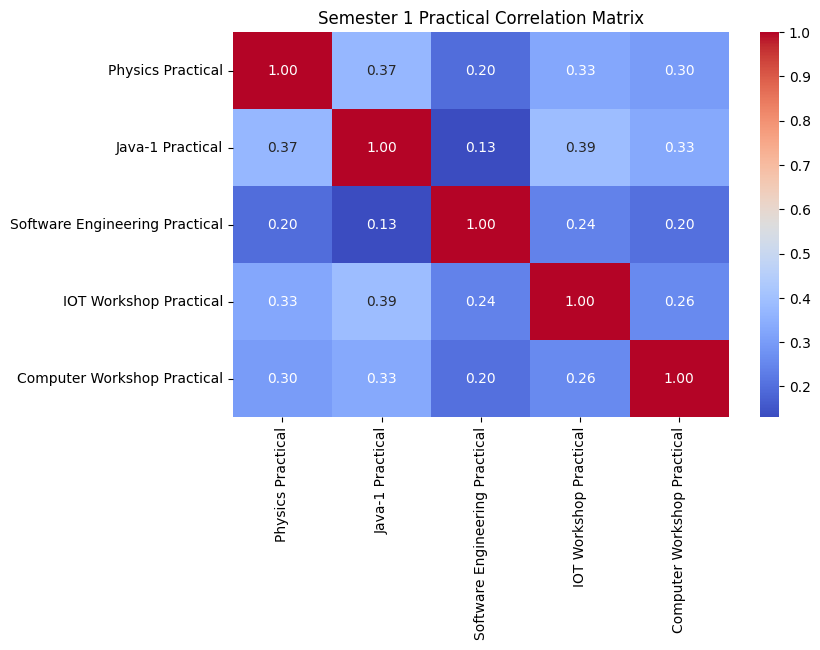

Semester 2 Practical Correlation Matrix:
                                                    Data Structures using Java Practical  \
Data Structures using Java Practical                                            1.000000   
DBMS Practical                                                                  0.904497   
Fundamental of Electronics and Electrical Pract...                              0.543530   
Java-2 Practical                                                                0.936743   

                                                    DBMS Practical  \
Data Structures using Java Practical                      0.904497   
DBMS Practical                                            1.000000   
Fundamental of Electronics and Electrical Pract...        0.596819   
Java-2 Practical                                          0.896087   

                                                    Fundamental of Electronics and Electrical Practical  \
Data Structures using Java Practical    

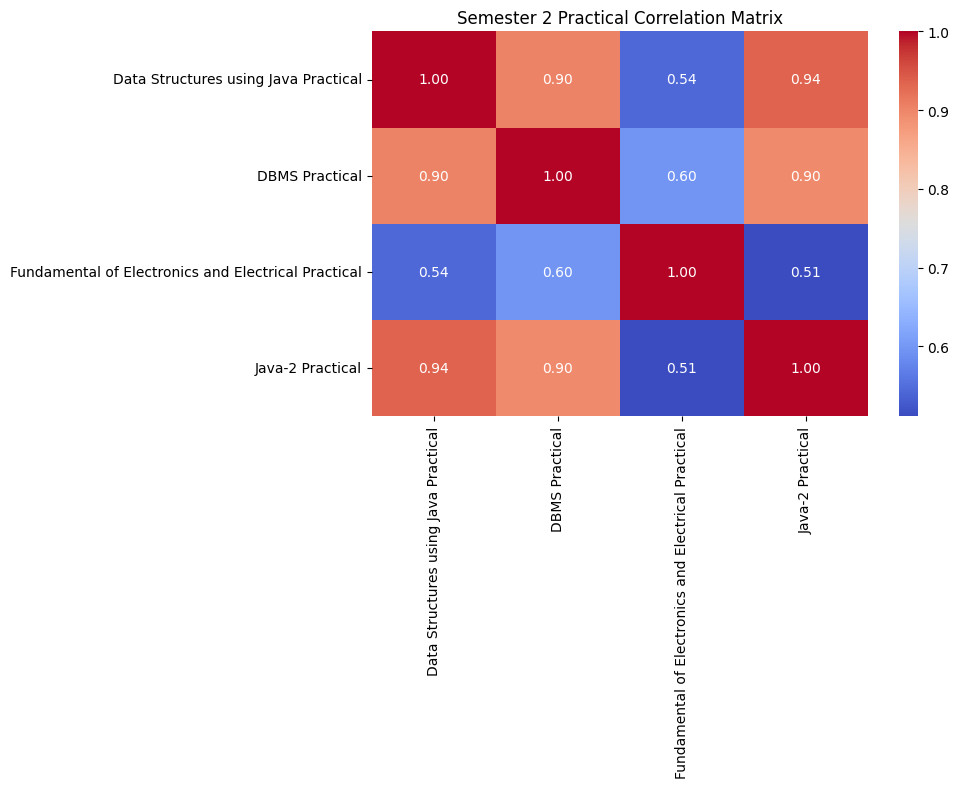

In [13]:
# Define practical subjects for Semester 1 and Semester 2
sem1_practical = ["Physics Practical", "Java-1 Practical", "Software Engineering Practical", 
                  "IOT Workshop Practical", "Computer Workshop Practical"]

sem2_practical = ["Data Structures using Java Practical", "DBMS Practical", 
                  "Fundamental of Electronics and Electrical Practical", "Java-2 Practical"]

# Compute correlation matrices for practical subjects
corr_sem1_practical = df_normalized[sem1_practical].corr()
corr_sem2_practical = df_normalized[sem2_practical].corr()


# Print correlation matrix for Semester 1 Practical
print("Semester 1 Practical Correlation Matrix:")
print(corr_sem1_practical)

# Plot heatmap for Semester 1 Practical
plt.figure(figsize=(8, 5))
sns.heatmap(corr_sem1_practical, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Semester 1 Practical Correlation Matrix")
plt.show()

# Print correlation matrix for Semester 2 Practical
print("Semester 2 Practical Correlation Matrix:")
print(corr_sem2_practical)

# Plot heatmap for Semester 2 Practical
plt.figure(figsize=(8, 5))
sns.heatmap(corr_sem2_practical, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Semester 2 Practical Correlation Matrix")
plt.show()


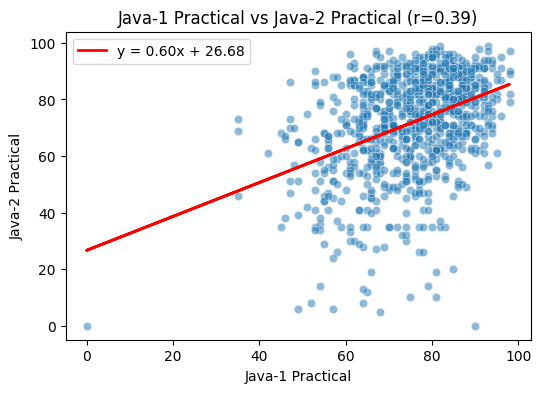

Predecessor-Successor Pair: Java-1 Practical → Java-2 Practical
Correlation: 0.39
Regression Equation: y = 0.60x + 26.68



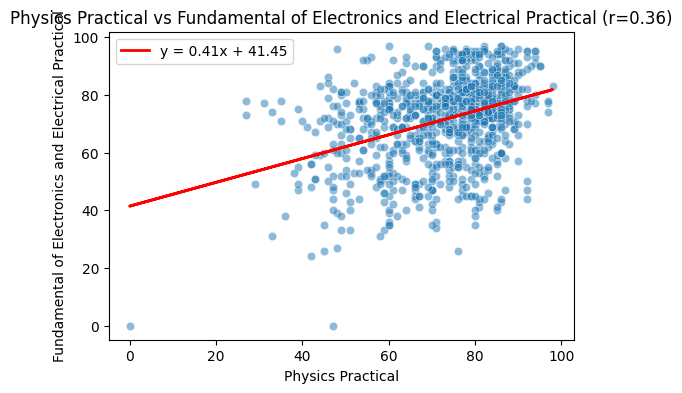

Predecessor-Successor Pair: Physics Practical → Fundamental of Electronics and Electrical Practical
Correlation: 0.36
Regression Equation: y = 0.41x + 41.45



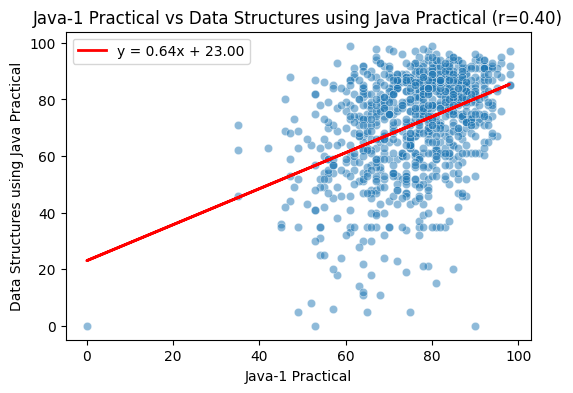

Predecessor-Successor Pair: Java-1 Practical → Data Structures using Java Practical
Correlation: 0.40
Regression Equation: y = 0.64x + 23.00



In [14]:
# Define predecessor-successor pairs for practical subjects
practical_predecessor_successor_pairs = [
    ("Java-1 Practical", "Java-2 Practical"),
    ("Physics Practical", "Fundamental of Electronics and Electrical Practical"),
    ("Java-1 Practical", "Data Structures using Java Practical")
]
# Generate scatter plots for Practical Predecessor-Successor Pairs
for col1, col2 in practical_predecessor_successor_pairs:
    if col1 in df_normalized.columns and col2 in df_normalized.columns:
        corr_value = df_normalized[col1].corr(df_normalized[col2])
        
        # Scatter plot
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_normalized[col1], y=df_normalized[col2], alpha=0.5)

        # Regression line
        x = df_normalized[col1]
        y = df_normalized[col2]
        m, b = np.polyfit(x, y, 1)  # Linear regression
        plt.plot(x, m * x + b, color="red", linewidth=2, label=f"y = {m:.2f}x + {b:.2f}")

        # Labels and title
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(f"{col1} vs {col2} (r={corr_value:.2f})")
        plt.legend()
        plt.show()

        # Print regression equation and correlation
        print(f"Predecessor-Successor Pair: {col1} → {col2}")
        print(f"Correlation: {corr_value:.2f}")
        print(f"Regression Equation: y = {m:.2f}x + {b:.2f}\n")
